big line:	[[60.0, 0.0], [60.0, 60.0]]


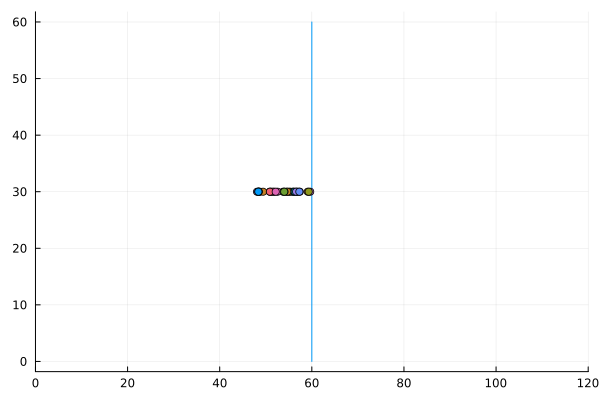

passed build big line


In [19]:
#=
Monte_Carlo_π
Kata
MIT license copyright Dr Keith S Reid 2023
Intent: dropped matchsticks model approximation of π
=#

# s.0 Packages

using Plots
using Test

# s.1 Config

function get_repeats()
    repeats::UInt64 = 32
    return repeats
end

function get_size_big_line()
    size::UInt64    = 60
    return size
end

function get_size_small_line()
    size::UInt64    = 12
    return size
end


# s.2 Structs

# s.3 Model

function build_big_line(size)
    big_line::Vector{Vector{Float64}} = [[size,0],[size,size]]
    return big_line
end

# s.4 View

function tell_repeats(repeats)
    println("This many repeats:\t", repeats)
end

# s.5 Control
function monte_carlo_π_main()
    
    repeats             = get_repeats()
    size_big_line       = get_size_big_line()    
    big_line            = build_big_line(size_big_line)
    mid_point           = [size_big_line,size_big_line/2]
    size_small_line     = get_size_small_line()
    println("big line:\t", big_line)
    π_graph             = plot([size_big_line,size_big_line],[0,size_big_line], legend=:false, xlims=(0,2*size_big_line))
    
    for repeats in 1:repeats
        small_x::Float64    = mid_point[1] - (rand() * size_small_line)
        small_y::Float64    = mid_point[2]
        small_start         = [small_x, small_y]
        graph = scatter!(π_graph, [small_x], [small_y])
    end
    
    display(π_graph)
end

monte_carlo_π_main()
    
# s.6 Tests
    
function test_build_big_line()
    size_big_line   = 2 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    
    size_big_line   = 0 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    
    size_big_line   = 100 # get_size_big_line()
    big_line        = build_big_line(size_big_line)
    @test big_line  == [[size_big_line, 0],[size_big_line, size_big_line]]
    @test typeof(big_line) == Vector{Vector{Float64}}
    @test typeof(big_line[1]) == Vector{Float64}
    @test typeof(big_line[1][1]) == Float64
    
    println("passed build big line")
    
end

function monte_carlo_π_main_tests()
    test_build_big_line()
end

monte_carlo_π_main_tests()
    
    

In [2]:
rand()

0.8831268680860966